In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov 10 15:10:01 2019

@author: Rajdeep
@author: Mtajic
"""

import matplotlib.pyplot as plt

from sklearn import svm, tree, datasets
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from skimage import io
from skimage.filters import gaussian
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate

class DataSet:
    def __init__(self, inputs=None, targets=None):
        self.inputs = [] if inputs is None else inputs
        self.targets = [] if targets is None else targets


if __name__ == '__main__':
    dataset = DataSet()
    print('Loading Training Data...')
    labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down', ]

    # TODO: need to shuffle data before partitioning
    # 75% to train
    for i in range(10):
        for label in labels:
            for j in range(1, 151):  # 201):
                label.split()
                image = io.imread('data/leapGestRecog/0' +
                                  str(i) + '/' +
                                  label + '/frame_0' +
                                  str(i) + '_' +
                                  label[0:2] + '_' +
                                  str(j).zfill(4) + '.png')
                # TODO: should we flatten or resize here?
                img_blurred = gaussian(image, sigma=1.65)
                dataset.inputs.append(resize(img_blurred, (60, 160), preserve_range=True).flatten())
                dataset.targets.append(label)



Loading Training Data...


c:\programs\python\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\programs\python\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [44]:
x_train, y_train = shuffle(dataset.inputs,dataset.targets)

In [45]:
print('Model Selection...')
testScores={}
myMaxScore=0
bestFunctionPrameters= ""
clf_cv5 = ""
for i in [6,7,8,9,10]:
    for j in ["gini", "entropy"]:
        clf = tree.DecisionTreeClassifier(criterion = j, random_state = 100, max_depth=i, max_features=240 )

        #perform 5-fold cross validation for each model
        scores = cross_validate(clf, x_train, y_train, scoring='precision_macro', cv=5,return_estimator=True)
        testScores[j+"_"+str(i)]= scores["test_score"]
        myScore =np.max(scores["test_score"], axis=0)
        print( j+"_"+str(i) , " Score: " , str(myScore) )
        if myScore>myMaxScore:
            clf_cv5= scores["estimator"][np.argmax(scores["test_score"], axis=0)]
            myMaxScore= myScore
            bestFunctionPrameters = j+"_"+str(i)

Model Selection...
gini_6  Score:  0.7636898080928295
entropy_6  Score:  0.7830246832553952
gini_7  Score:  0.8011483778606827
entropy_7  Score:  0.8832578802407103
gini_8  Score:  0.8642661252815765
entropy_8  Score:  0.9375124995705587
gini_9  Score:  0.9076931574439409
entropy_9  Score:  0.9561438504262793
gini_10  Score:  0.946592423854263
entropy_10  Score:  0.9711257790569702


In [48]:
print('Training...')
bst_dt = clf_cv5
      
#bst_dt.fit(X=dataset.inputs, y=dataset.targets)
labels = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down', ]
print('Loading Testing Data...')
# 25% to test
test_data = DataSet()
for i in range(10):
    for label in labels:
        for j in range(151, 201):  # 1, 201):
                label.split()
                image = io.imread('data/leapGestRecog/0' +
                                  str(i) + '/' +
                                  label + '/frame_0' +
                                  str(i) + '_' +
                                  label[0:2] + '_' +
                                  str(j).zfill(4) + '.png')
                img_blurred = gaussian(image, sigma=1.65)
                test_data.inputs.append(resize(img_blurred, (60, 160), preserve_range=True).flatten())
                test_data.targets.append(label)

print('Testing...')
predicted = bst_dt.predict(test_data.inputs)
print("\nClassification Report")
print(classification_report(predicted, test_data.targets))
print (confusion_matrix(predicted, test_data.targets))

Training...
Loading Testing Data...


c:\programs\python\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\programs\python\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Testing...

Classification Report
               precision    recall  f1-score   support

      01_palm       0.92      0.82      0.87       561
         02_l       0.88      0.85      0.86       517
      03_fist       0.74      0.79      0.77       467
04_fist_moved       0.90      0.92      0.91       488
     05_thumb       0.87      0.91      0.89       478
     06_index       0.86      0.90      0.88       480
        07_ok       0.92      0.96      0.94       480
08_palm_moved       0.83      0.89      0.86       471
         09_c       0.92      0.84      0.88       550
      10_down       0.94      0.92      0.93       508

     accuracy                           0.88      5000
    macro avg       0.88      0.88      0.88      5000
 weighted avg       0.88      0.88      0.88      5000

[[459   6   8   1  49   3  19   0   6  10]
 [  2 439  49   5   9   2   0   0   7   4]
 [  5  26 370  29   2  17   0   1  13   4]
 [  1   9  10 451   0   0   0   1   3  13]
 [ 20   0  13   0 437

#Visualizing the decisoin tree graph

Visualizing the decisoin tree graph


c:\programs\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.735395 to fit



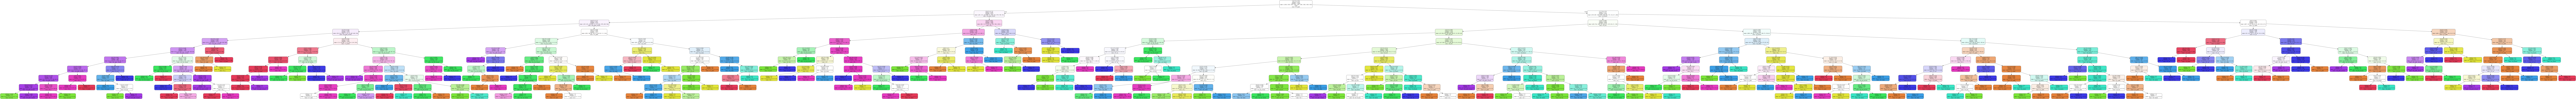

In [50]:
print('Visualizing the decisoin tree graph')
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
tree.export_graphviz(bst_dt, out_file=dot_data
                    , feature_names= [f"X{i},{j}" for i in range(60) for j in range (160)]
                    , class_names=['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb',
              '06_index', '07_ok', '08_palm_moved', '09_c', '10_down', ]
                    , filled=True, rounded=True
                    , special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

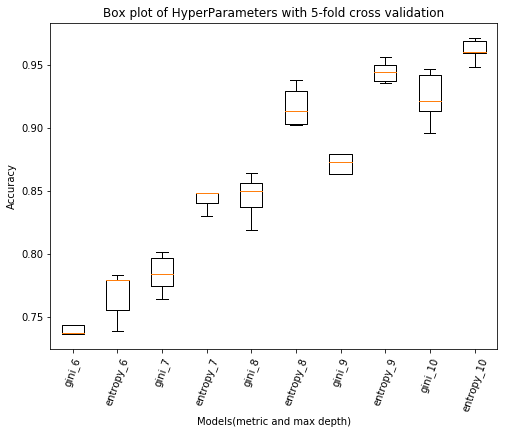

In [49]:
# creating the box plot for model-selection
s = testScores.values()
labels= testScores.keys()


fig = plt.figure(figsize=(8,6))

plt.boxplot([x for x in s], 0, '', 1)
plt.xticks([y+1 for y in range(len([x for x in s]))], labels,rotation=70)
plt.xlabel('Models(metric and max depth)')
plt.ylabel('Accuracy')
t = plt.title('Box plot of HyperParameters with 5-fold cross validation')
plt.show()
